### 2018. 8. 10 신재혁

In [1]:
# import packages
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
ss = stats
import os
import gc
%matplotlib inline 

# Part1: Feature Engineering

## Data Import

In [2]:
def read_pickle(path, file_name):
    with open("".join([path, '/', file_name, '.pkl']), 'rb') as f:
        return pickle.load(f)

data_path = './data'

In [3]:
X, y = read_pickle(data_path, 'techtalk_dataset_180810')

## Data 살펴보기

In [4]:
X.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,relationship,native.country,education,race,marital.status,sex,workclass,occupation
0,NaN,NaN,9.0,0.0,4356.0,40.0,NaN,United-States,HS-grad,NaN,Widowed,Female,NaN,?
1,82.0,NaN,9.0,0.0,4356.0,18.0,Not-in-family,United-States,HS-grad,NaN,Widowed,NaN,NaN,Exec-managerial
2,66.0,NaN,10.0,0.0,4356.0,40.0,Unmarried,United-States,NaN,NaN,Widowed,NaN,NaN,?
3,54.0,NaN,4.0,0.0,3900.0,40.0,Unmarried,United-States,7th-8th,White,Divorced,NaN,NaN,NaN
4,41.0,264663.0,10.0,0.0,3900.0,40.0,NaN,United-States,NaN,NaN,Separated,Female,NaN,NaN


In [5]:
X.describe(include='all')

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,relationship,native.country,education,race,marital.status,sex,workclass,occupation
count,20709.000000,1.938500e+04,21005.000000,29712.000000,27100.000000,30120.000000,16988,30589,20793,16711,32088,14238,13136,24412
unique,NaN,NaN,NaN,NaN,NaN,NaN,6,42,16,5,7,2,9,15
top,NaN,NaN,NaN,NaN,NaN,NaN,Husband,United-States,HS-grad,White,Married-civ-spouse,Male,Private,Prof-specialty
freq,NaN,NaN,NaN,NaN,NaN,NaN,6926,27408,6688,14282,14763,9565,9173,3082
mean,38.479404,1.896777e+05,10.100928,1074.488403,87.559265,40.441303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,13.630069,1.048171e+05,2.565130,7362.329102,403.713715,12.326229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,28.000000,1.179830e+05,9.000000,0.000000,0.000000,40.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,37.000000,1.785300e+05,10.000000,0.000000,0.000000,40.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,47.000000,2.377200e+05,13.000000,0.000000,0.000000,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
X.dtypes

age               float32
fnlwgt            float32
education.num     float32
capital.gain      float32
capital.loss      float32
hours.per.week    float32
relationship       object
native.country     object
education          object
race               object
marital.status     object
sex                object
workclass          object
occupation         object
dtype: object

In [7]:
X.count()

age               20709
fnlwgt            19385
education.num     21005
capital.gain      29712
capital.loss      27100
hours.per.week    30120
relationship      16988
native.country    30589
education         20793
race              16711
marital.status    32088
sex               14238
workclass         13136
occupation        24412
dtype: int64

In [8]:
target_proprotion = pd.Series(y).value_counts()

print("The number of 0's: ", target_proprotion[0])
print(" ")
print("The number of 1's: ", target_proprotion[1])
print(" ")
print("Positive Label Percentage: ", target_proprotion[1]*100/(target_proprotion[0] + target_proprotion[1]), "%")

The number of 0's:  24720
 
The number of 1's:  7841
 
Positive Label Percentage:  24.080955744602438 %


In [9]:
num_cols = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
cat_cols = list(set(X.columns) - set(num_cols))

## (1) Missing Value Imputation

In [10]:
def EDA_NA(df):
    nullproportion = (len(df) - df.count())/ len(df)
    na_cols = list(nullproportion[nullproportion>0].index)

    print("The number of na columns: ", len(na_cols))
    print(" ")
    print("The name of na columns: ")
    print(na_cols)
    print(" ")
    print("The statistic of na columns: ")
    print(nullproportion[na_cols])
    return na_cols

In [11]:
na_cols = EDA_NA(X)

The number of na columns:  14
 
The name of na columns: 
['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'relationship', 'native.country', 'education', 'race', 'marital.status', 'sex', 'workclass', 'occupation']
 
The statistic of na columns: 
age               0.363994
fnlwgt            0.404656
education.num     0.354903
capital.gain      0.087497
capital.loss      0.167716
hours.per.week    0.074967
relationship      0.478272
native.country    0.060563
education         0.361414
race              0.486779
marital.status    0.014527
sex               0.562728
workclass         0.596573
occupation        0.250269
dtype: float64


In [12]:
def EDA_unique_values(df):
    levels = df.nunique()
    print("--- The number of unique_values ---")
    print(levels)

    need_see_what_levels = levels[levels < 100].index

    print()
    print("--- What values are inclued in each columns ---")

    levels_dict = {}
    for col in need_see_what_levels:
        unique_values = df[col].unique()
        try:
            unique_values.sort()
        except:
            unique_values = unique_values.astype('str')
            unique_values.sort()
        levels_dict[col] = unique_values
        print(col)
        print(unique_values)

    return levels, levels_dict

In [13]:
level, levels_dict = EDA_unique_values(X)

--- The number of unique_values ---
age                  71
fnlwgt            14685
education.num        16
capital.gain        117
capital.loss         89
hours.per.week       94
relationship          6
native.country       42
education            16
race                  5
marital.status        7
sex                   2
workclass             9
occupation           15
dtype: int64

--- What values are inclued in each columns ---
age
[17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.
 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52.
 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70.
 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 87. 88. 90. nan]
education.num
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. nan]
capital.loss
[   0.  155.  213.  323.  419.  625.  653.  810.  880.  974. 1092. 1138.
 1258. 1340. 1380. 1408. 1411. 1485. 1504. 1539. 1564. 1573. 1579. 1590.
 1594. 1602. 1617. 1628. 1

위를 통해 아래와 같이 생각할 수 있다.

- native.country, workclass, occupation: ? 범주값이 존재하는 범주형 변수
    - → ?로 Imputation하면 됨
- age / education_num / relationship / martial.status / education : 나이와 교육년수와 결혼유무는 상관관계가 있음. 따라서 3개 변수 중 하나만 있어도 나머지 2개 변수의 Missing을 채우는 데 Hint가 될 수 있음
    - → Imputation Modeling을 사용
- race, sex: Hint가 보이지 않음. 범주형 변수의 General case로 가자
    - → Make NA as a level
- fnlwgt / capital.gain / capital.loss / hours.per.week: Hint가 보이지 않음. 연속형 변수의 General case로 가자
    - → Tree-based Model: -900000, Non-tree model: Mean Imputation

In [14]:
# native.country, workclass, occupation: ?로 Imputation
X["native.country"] = X["native.country"].fillna("?")
X["workclass"] = X["workclass"].fillna("?")
X["occupation"] = X["occupation"].fillna("?")

# race, sex: Make NA as a level
X["race"] = X["race"].fillna("NA_level")
X["sex"] = X["sex"].fillna("NA_level")

In [15]:
# For Tree-based Model
X_tree = X.copy()

X_tree["fnlwgt"] = X_tree["fnlwgt"].fillna(-9e+10)
X_tree["capital.gain"] = X_tree["capital.gain"].fillna(-9e+10)
X_tree["capital.loss"] = X_tree["capital.loss"].fillna(-9e+10)
X_tree["hours.per.week"] = X_tree["hours.per.week"].fillna(-9e+10)

# For Non-tree Model
X_nontree = X.copy()

X_nontree["fnlwgt"] = X_nontree["fnlwgt"].fillna(X_nontree["fnlwgt"].mean())
X_nontree["capital.gain"] = X_nontree["capital.gain"].fillna(X_nontree["capital.gain"].mean())
X_nontree["capital.loss"] = X_nontree["capital.loss"].fillna(X_nontree["capital.loss"].mean())
X_nontree["hours.per.week"] = X_nontree["hours.per.week"].fillna(X_nontree["hours.per.week"].mean())

In [16]:
from missforest import MissForestImputer

/Users/hyundai/anaconda/envs/pytorch/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [17]:
%%time

imputer = MissForestImputer()
X_imp = imputer.fit_transform(X_tree)

CPU times: user 31 s, sys: 1.25 s, total: 32.2 s
Wall time: 20.6 s


In [18]:
missforest_cols = ["age", "education.num", "relationship", "marital.status", "education"]
missforest_num_cols = list(set(missforest_cols) & set(num_cols))
missforest_cat_cols = list(set(missforest_cols) & set(cat_cols))

print(missforest_num_cols)
print(missforest_cat_cols)

['education.num', 'age']
['relationship', 'marital.status', 'education']


In [19]:
for col in missforest_num_cols:
    X_tree[col] = X_imp[col]
    X_nontree[col] = X_imp[col]

In [20]:
mapping_dict = {}

for col in missforest_cat_cols:
    temp_dict = {}
    for value in set(X_imp[col]):
        temp_series = X_tree[col].copy()
        temp_series = temp_series[X_imp[col]==value].dropna()
        temp_value = list(temp_series)[0]
        temp_dict[value] = temp_value
    mapping_dict[col] = temp_dict

In [21]:
for col in missforest_cat_cols:
    X_tree[col] = X_imp[col].map(mapping_dict[col])
    X_nontree[col] = X_imp[col].map(mapping_dict[col])

In [22]:
X.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,relationship,native.country,education,race,marital.status,sex,workclass,occupation
0,NaN,NaN,9.0,0.0,4356.0,40.0,NaN,United-States,HS-grad,NA_level,Widowed,Female,?,?
1,82.0,NaN,9.0,0.0,4356.0,18.0,Not-in-family,United-States,HS-grad,NA_level,Widowed,NA_level,?,Exec-managerial
2,66.0,NaN,10.0,0.0,4356.0,40.0,Unmarried,United-States,NaN,NA_level,Widowed,NA_level,?,?
3,54.0,NaN,4.0,0.0,3900.0,40.0,Unmarried,United-States,7th-8th,White,Divorced,NA_level,?,?
4,41.0,264663.0,10.0,0.0,3900.0,40.0,NaN,United-States,NaN,NA_level,Separated,Female,?,?


In [23]:
X_tree.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,relationship,native.country,education,race,marital.status,sex,workclass,occupation
0,53.400002,-9.000000e+10,9.0,0.0,4356.0,40.0,Not-in-family,United-States,HS-grad,NA_level,Widowed,Female,?,?
1,82.000000,-9.000000e+10,9.0,0.0,4356.0,18.0,Not-in-family,United-States,HS-grad,NA_level,Widowed,NA_level,?,Exec-managerial
2,66.000000,-9.000000e+10,10.0,0.0,4356.0,40.0,Unmarried,United-States,Some-college,NA_level,Widowed,NA_level,?,?
3,54.000000,-9.000000e+10,4.0,0.0,3900.0,40.0,Unmarried,United-States,7th-8th,White,Divorced,NA_level,?,?
4,41.000000,2.646630e+05,10.0,0.0,3900.0,40.0,Not-in-family,United-States,Some-college,NA_level,Separated,Female,?,?


In [24]:
X_nontree.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,relationship,native.country,education,race,marital.status,sex,workclass,occupation
0,53.400002,189677.671875,9.0,0.0,4356.0,40.0,Not-in-family,United-States,HS-grad,NA_level,Widowed,Female,?,?
1,82.000000,189677.671875,9.0,0.0,4356.0,18.0,Not-in-family,United-States,HS-grad,NA_level,Widowed,NA_level,?,Exec-managerial
2,66.000000,189677.671875,10.0,0.0,4356.0,40.0,Unmarried,United-States,Some-college,NA_level,Widowed,NA_level,?,?
3,54.000000,189677.671875,4.0,0.0,3900.0,40.0,Unmarried,United-States,7th-8th,White,Divorced,NA_level,?,?
4,41.000000,264663.000000,10.0,0.0,3900.0,40.0,Not-in-family,United-States,Some-college,NA_level,Separated,Female,?,?


## Numeric Feature Engineering

### EDA for Numeric Columns
- 수치형 변수
  - 변수값의 분포도(Value 기준의 Bar Plot와 Density Plot)
  - y=0일 때의 변수값과 y=1일 때의 변수값의 분포도(Value 기준의 Density Plot)

In [25]:
def EDA_num_col(X, y, col, color='green'):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6))
    plt.suptitle("Density plot of {}".format(col), fontsize=16)
    sns.set_color_codes("pastel")
    sns.set_style('white')

    # plot1
    s = sns.distplot(ax=ax1, a=X[col].dropna(), color=color, kde=True,
                     bins=100, axlabel=col, label='Density of {}'.format(col))
    ax1.set(xlabel=col, ylabel="density")

    # plot2
    X1 = X.loc[y != 0][col]
    X0 = X.loc[y == 0][col]

    s = sns.kdeplot(X1, bw=0.5, label="TARGET = 1", ax=ax2)
    s = sns.kdeplot(X0, bw=0.5, label="TARGET = 0", ax=ax2)
    ax2.set(xlabel=col, ylabel="density")

    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show()

/Users/hyundai/anaconda/envs/pytorch/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


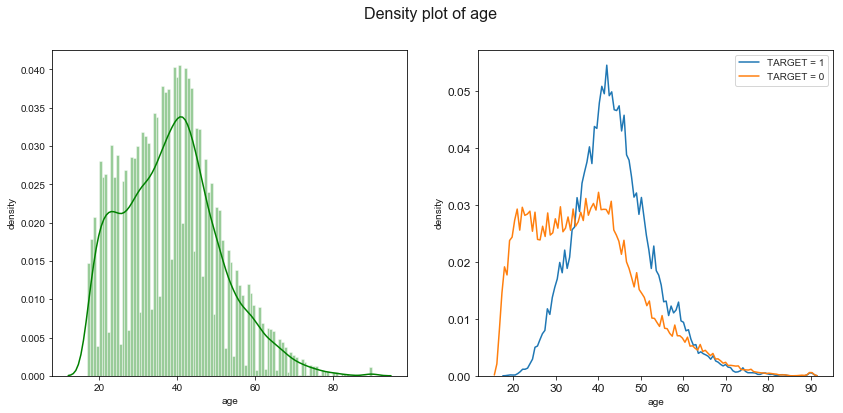

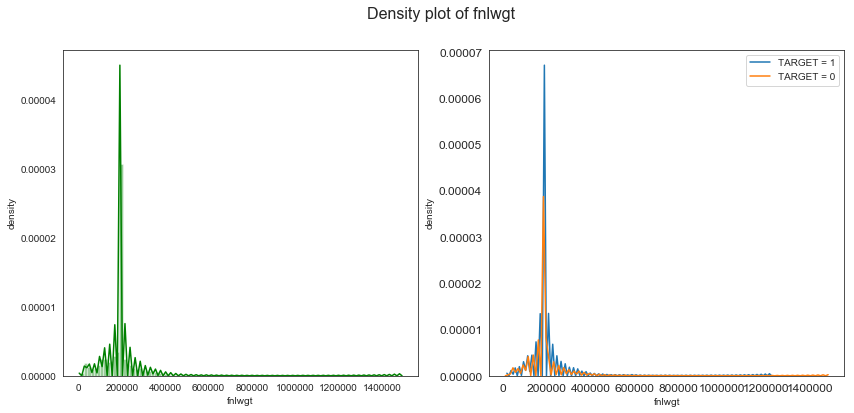

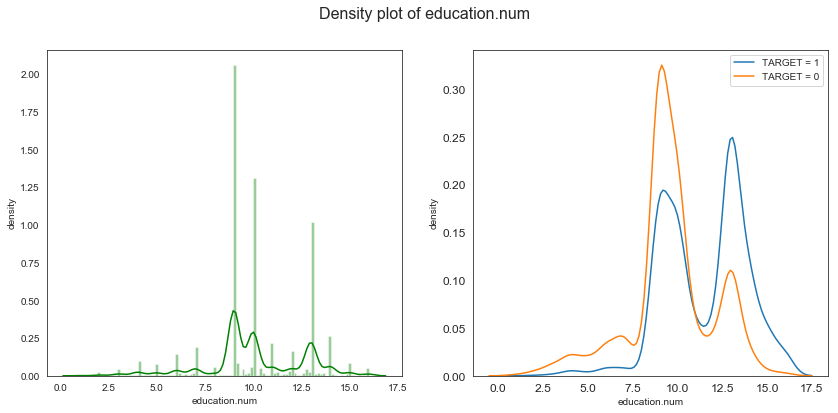

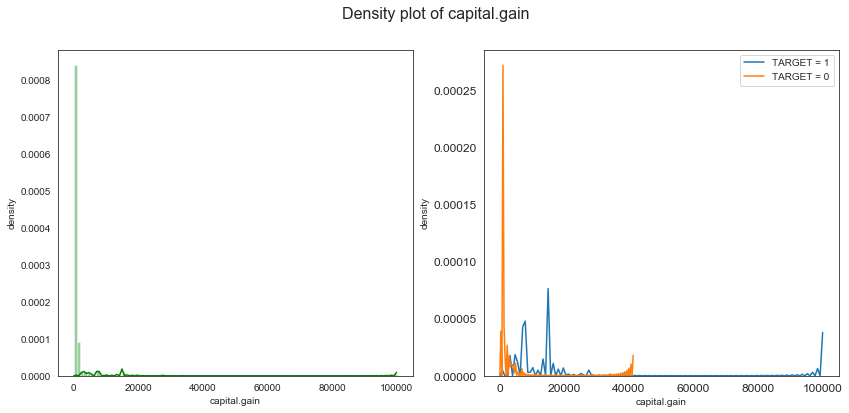

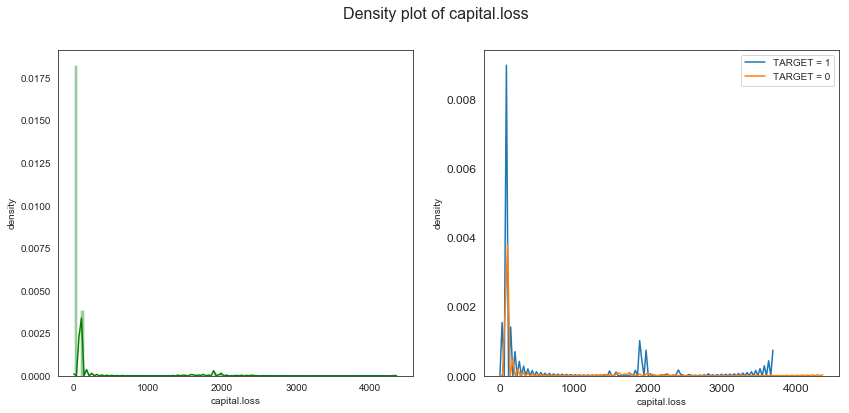

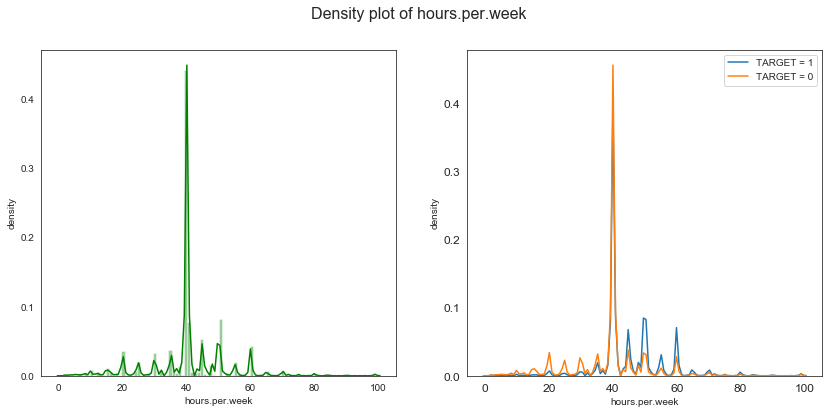

In [26]:
for col in num_cols:
    EDA_num_col(X_nontree, y, col)

### EDA for Numeric Columns 해석
- 전반적으로 Normal 분포를 보이는 변수는 없음
  - 그나마 Age가 가장 Normal 분포를 보이는 듯하나, 이 역시도 부족한 수준
  - NN(Neural Network), LR(Logistic Regression) 등의 수치형 변수의 표준화가 필요한 Modeling을 하기 전에 처리가 필요해보임
  - Normalization을 잘 시킨다는 Box-Cox Transformation을 시도해보고, 변환이 잘 되지 않는 경우에는 일반적인 Standard Scaler를 적용할 예정 
- fnlwgt 변수와 house.per.week 변수는 y=0일 때의 변수값과 y=1일 때의 변수값의 분포도가 거의 차이 없음
  - 변수 중요도가 낮을 것으로 예상됨
- education.num, capital.gain, capital.loss 변수들은 분포가 들쭉 날쭉하면서 이산적인 특성을 띔. 또한 y=0일 때의 변수값과 y=1일 때의 변수값의 분포도의 차이가 커서 중요 변수로 예상됨
  - 분포가 들쭉 날쭉하면서 이산적인 특성을 띔
  - y=0일 때의 변수값과 y=1일 때의 변수값의 분포도의 차이가 커서 중요 변수로 예상됨 
  - 이러한 특징을 잘 반영하기 위해, Binning 변수를 파생 변수로 추가 (Feature Engineering)

#### Binning

In [27]:
def get_bins(X, col, bin_num):
    unique_series = X[col].unique()
    _, bins = pd.qcut(unique_series, bin_num, retbins=True)
    bins[0] = bins[0]-0.01
    return bins

In [28]:
will_be_binned = ["education.num", "capital.gain", "capital.loss"]
binning_cols = [col+'_bin' for col in will_be_binned]
cat_cols += binning_cols

for col in will_be_binned:
    bin_col = col+'_bin'
    bins = get_bins(X_nontree, col, bin_num=10)
    X_nontree.loc[:,bin_col] = pd.cut(X_nontree[col], bins).astype(str)

X_tree[binning_cols] = X_nontree[binning_cols]

# Categorical Feature Engineering

### EDA for Categorical Columns
- 범주형 변수
  - 각 범주의 발생빈도 Histogram
  - 각 범주의 y=1 Percentage Histogram

In [29]:
def EDA_cat_col(X, y, col, label_rotation=False, horizontal_layout=True):
    temp = X[col].value_counts()
    value_dist = pd.DataFrame({col: temp.index, 'value frequency': temp.values})

    temp = pd.DataFrame({col: X[col].values, 'target': y})
    label_dist_per_value = temp.groupby(col, as_index=False).mean()
    label_dist_per_value.sort_values(by='target', ascending=False, inplace=True)

    if horizontal_layout:
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(14, 12))
    sns.set_color_codes("pastel")
    plt.suptitle("Frequency & Target Percentage of {}".format(col), fontsize=16)

    # plot1
    s = sns.barplot(ax=ax1, x=col, y="value frequency", data=value_dist)
    if label_rotation:
        s.set_xticklabels(s.get_xticklabels(), rotation=90)

    # plot2
    s = sns.barplot(ax=ax2, x=col, y='target',
                    order=label_dist_per_value[col],
                    data=label_dist_per_value)
    if label_rotation:
        s.set_xticklabels(s.get_xticklabels(), rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show()

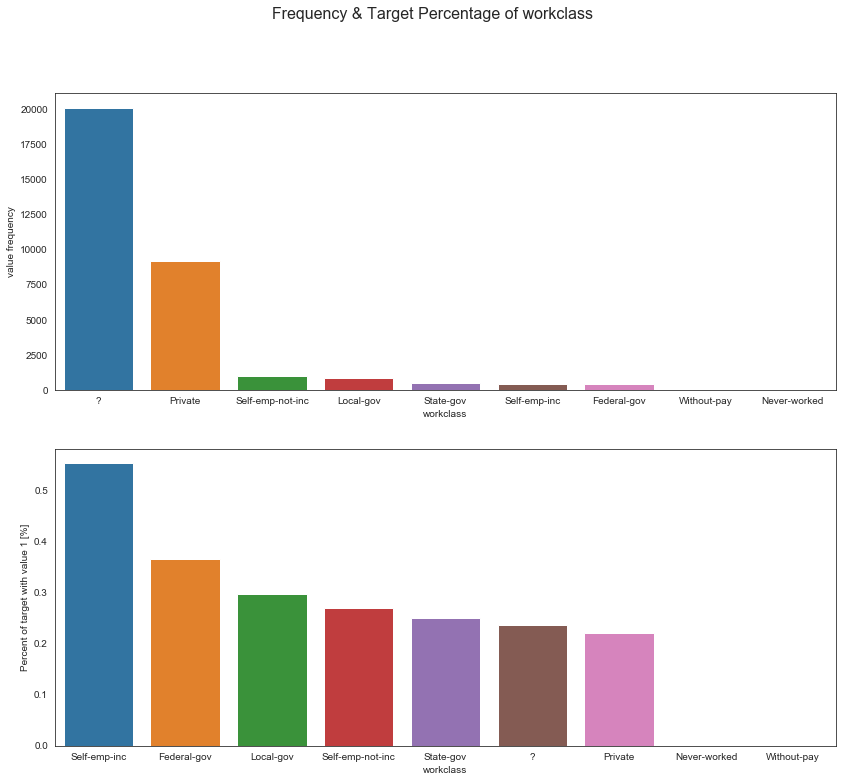

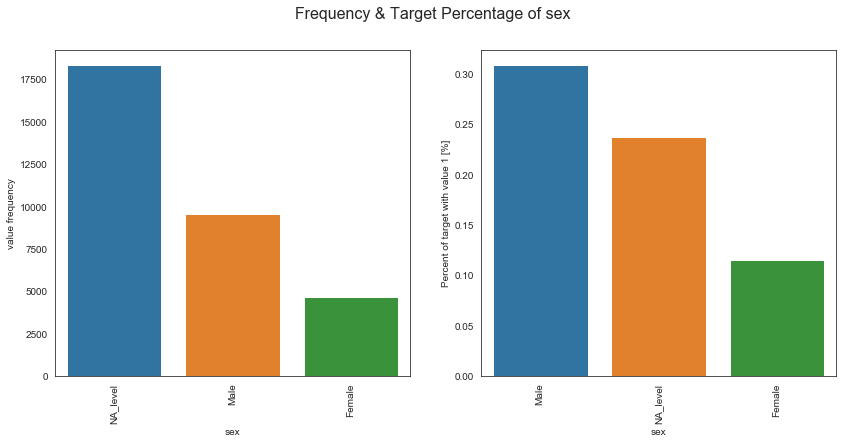

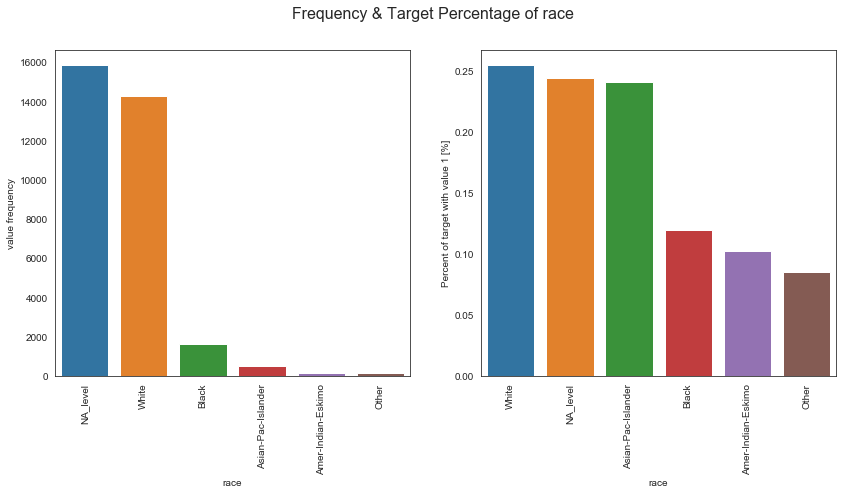

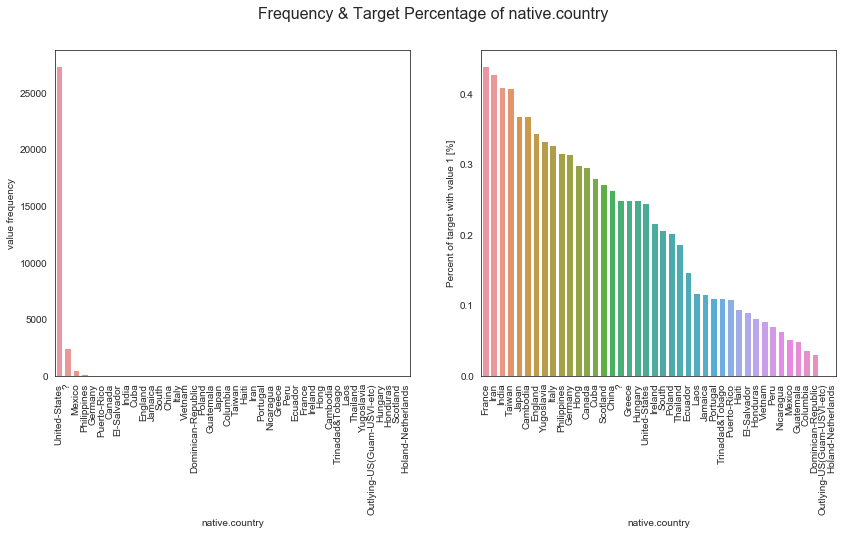

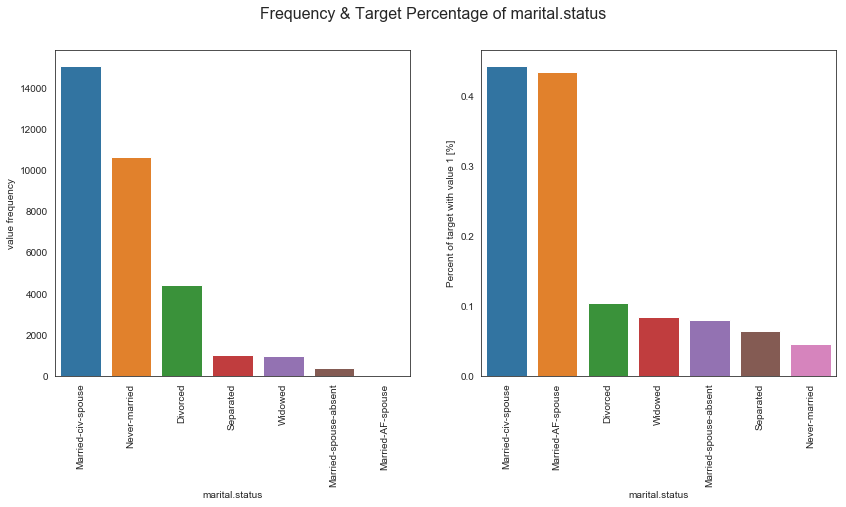

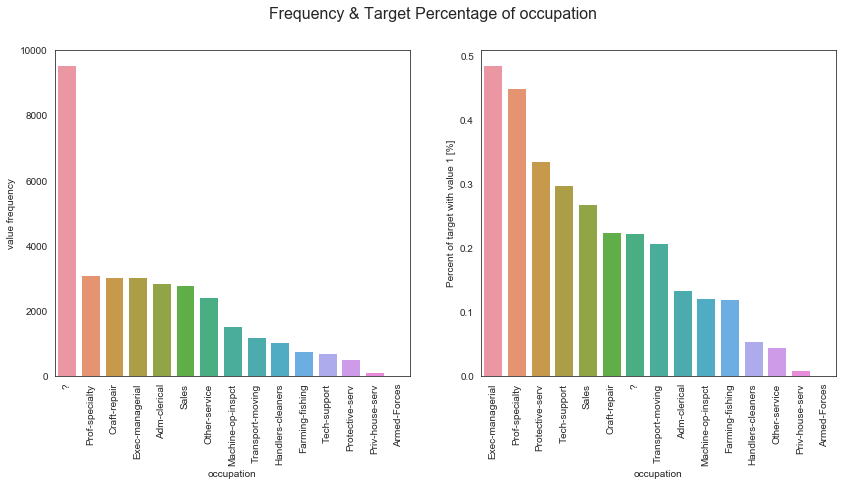

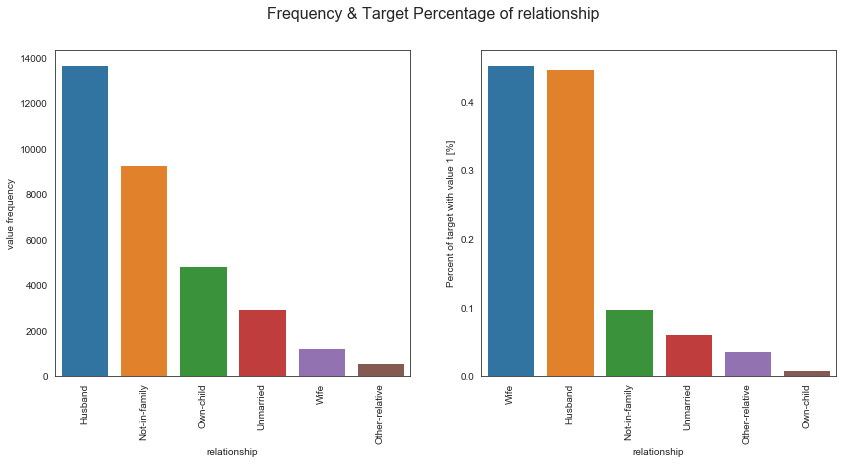

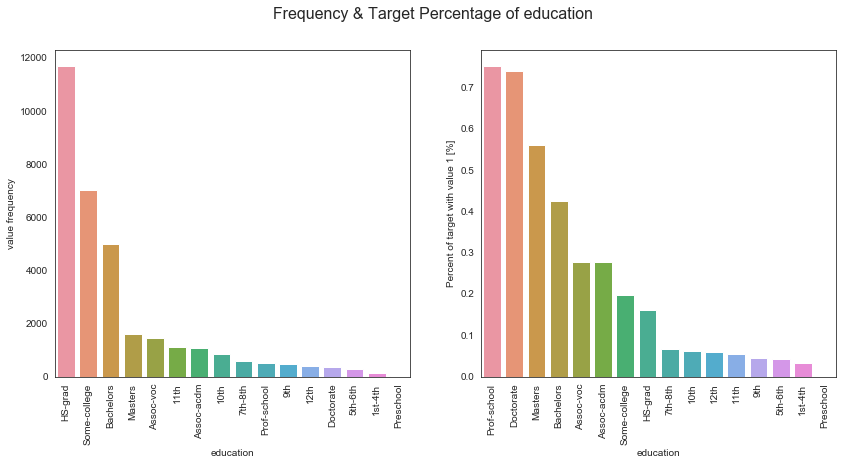

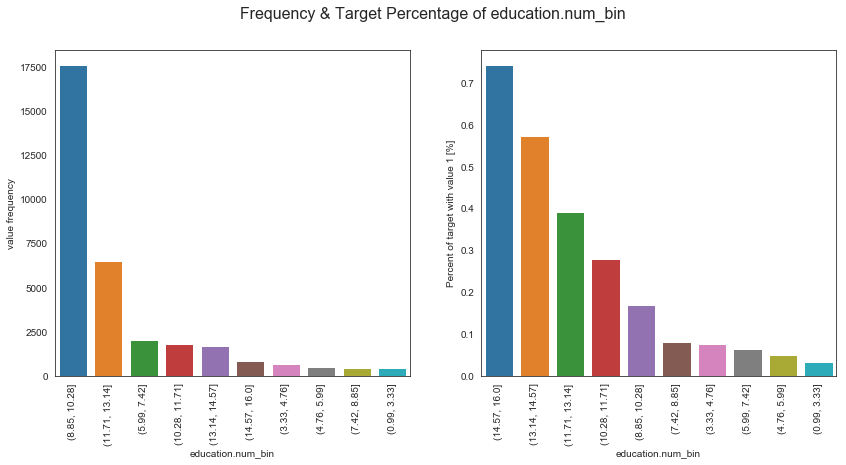

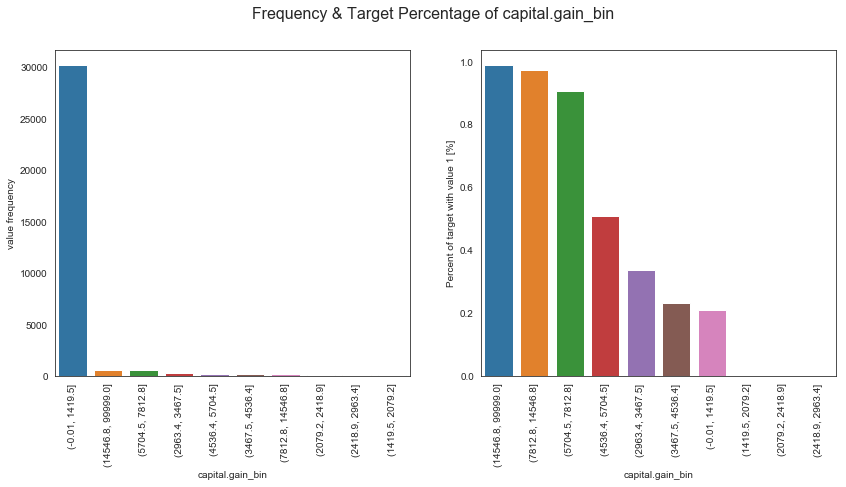

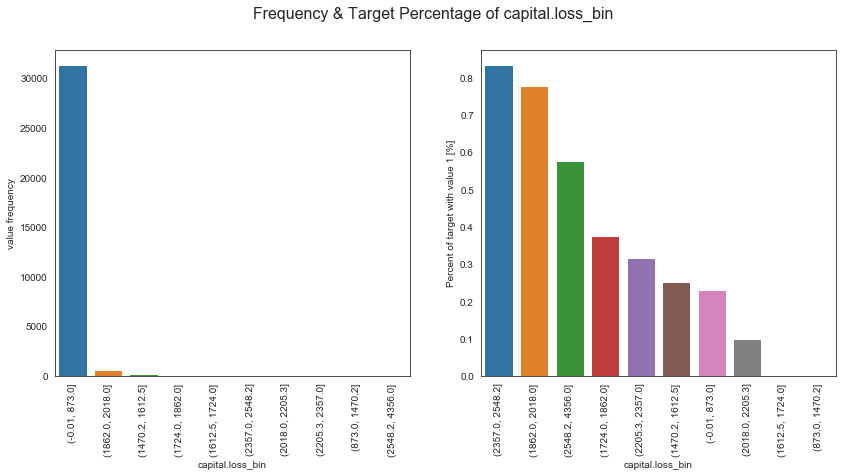

In [30]:
EDA_cat_col(X_nontree, y, cat_cols[0], False, False)

for col in cat_cols[1:]:
    EDA_cat_col(X_nontree, y, col, True, True)

### EDA for Categorical Columns 해석
- 어떤 변수가 빈도수가 높으면서 y=1인 비율이 높은지 알 수 있어, 범주형 변수 내 중요 범주가 무엇인지 파악할 수 있었다.
- native.country 변수의 경우
  - 범주 Level이 30 이상
  - 상위 1개 범주값(United-States)이 대부분의 관측값을 차지
  - 상위 3개 범주값만 빈도가 어느정도 있고, 나머지는 거의 없는 수준
  - 단순 One-Hot Encoding을 사용하기 보다는 Embedding이나 Frequency 기반의 방법론으로 사용하는 것이 효율적이어 보임
  - (단, Tree-based Model에선 자체적으로 처리하는 Algorithm이 있으므로, Label Encoding만 함)
- 나머지 변수들의 경우
  - Label Encoding (Tree-based Model) -> One-Hot Encoding (etc model)로 Feature Engineering하면 될 듯

#### Cramer's V를 통한 두 범주형 변수의 상관관계 측정. 0 ~ 1 사이의 범위

In [31]:
def cramers_v_corr(df):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    output = pd.DataFrame(index=df.columns, columns=df.columns)
    for col1 in df.columns:
        for col2 in df.columns:
            confusion_matrix = pd.crosstab(df[col1], df[col2])
            chi2 = ss.chi2_contingency(confusion_matrix)[0]
            n = np.array(confusion_matrix).sum()
            phi2 = chi2 / n
            r, k = confusion_matrix.shape
            phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
            rcorr = r - ((r - 1) ** 2) / (n - 1)
            kcorr = k - ((k - 1) ** 2) / (n - 1)
            cramers_v = np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))
            output.loc[col1, col2] = cramers_v
    return output

In [32]:
cramers_v_corr(X_nontree[cat_cols])

,workclass,sex,race,native.country,marital.status,occupation,relationship,education,education.num_bin,capital.gain_bin,capital.loss_bin
workclass,1,0.0414375,0.0208215,0.017391,0.047175,0.106592,0.0561355,0.0529651,0.0517739,0.0339834,0.0102939
sex,0.0414375,1,0.0394728,0.0242344,0.214441,0.169683,0.318657,0.0396206,0.0291016,0.0406023,0.0290926
race,0.0208215,0.0394728,1,0.250117,0.0514817,0.041197,0.058551,0.0459156,0.0399939,0,0
native.country,0.017391,0.0242344,0.250117,1,0.0591489,0.0470533,0.0636076,0.116287,0.145151,0.0167161,0.0403106
marital.status,0.047175,0.214441,0.0514817,0.0591489,1,0.109011,0.493589,0.0847402,0.0776616,0.0787707,0.051318
occupation,0.106592,0.169683,0.041197,0.0470533,0.109011,1,0.147034,0.161039,0.194794,0.0469296,0.0276562
relationship,0.0561355,0.318657,0.058551,0.0636076,0.493589,0.147034,1,0.121362,0.113791,0.0904275,0.0584719
education,0.0529651,0.0396206,0.0459156,0.116287,0.0847402,0.161039,0.121362,1,0.85859,0.0781542,0.0422052
education.num_bin,0.0517739,0.0291016,0.0399939,0.145151,0.0776616,0.194794,0.113791,0.85859,1,0.0768205,0.0398355
capital.gain_bin,0.0339834,0.0406023,0,0.0167161,0.0787707,0.0469296,0.0904275,0.0781542,0.0768205,1,0.00842615


##### Cramer's V 해석
- Cramer's V 계수 0.5이상은 education / education.num_bin 말고는 없음
- education / education.num_bin 변수를 제외한 나머지는 그대로 사용
- education / education.num_bin 변수는 CrossProduct하여 1개 변수로 사용하는 것이 좋아보임

In [33]:
will_be_combined = ["education", "education.num_bin"]
combined_col = '_'.join(will_be_combined)
cat_cols += [combined_col]
cat_cols = list(set(cat_cols) - set(will_be_combined))

X_tree.loc[:, combined_col] = X_tree[will_be_combined].sum(axis=1).astype(str)
X_nontree.loc[:, combined_col] = X_nontree[will_be_combined].sum(axis=1).astype(str)

In [34]:
X_tree = X_tree[num_cols + cat_cols]
X_nontree = X_nontree[num_cols + cat_cols]

## Label Encoding
- 범주형 변수: Label Encoding
- Tree-based Model은 여기까지 전처리된 데이터를 사용한다

In [35]:
def labelencoder_fit(df, cat_cols):
    cat_df = df[cat_cols].astype(str)
    from sklearn.preprocessing import LabelEncoder
    from collections import defaultdict
    d = defaultdict(LabelEncoder)
    cat_df.apply(lambda x: d[x.name].fit(x))
    return d


def labelencoding(df, d, cat_cols):
    cat_df = df[cat_cols].astype(str)
    cat_df = cat_df.apply(lambda x: d[x.name].transform(x))
    out_df = df.drop(cat_cols, axis=1)
    out_df[cat_cols] = cat_df
    return out_df

In [36]:
%%time

d = labelencoder_fit(X_tree, cat_cols)
X_tree = labelencoding(X_tree, d, cat_cols)
X_nontree = labelencoding(X_nontree, d, cat_cols)

CPU times: user 1.5 s, sys: 12.1 ms, total: 1.51 s
Wall time: 1.55 s


## Dev(Train / Valid) /  Test Split
- Tree-based 모형과 다른 방법론 모형을 정확하게 비교하기 위해, 이 시점에서 Dev Data와 Test Data를 나눈다.
- 또한 학습의 유효성 판정(Validation) 시의 정확한 성능 비교를 위해, Validation Data도 여기서 나누어 고정한다.
- Test Data는 Validation Data에서 가장 높은 성능을 보였던 모형으로 최종 검증에서 사용한다. (그 전까지 y_test는 봉인한다)

In [37]:
from sklearn.model_selection import train_test_split

X_tree_dev, X_tree_test, X_nontree_dev, X_nontree_test, X_benchmark_dev, X_benchmark_test, y_dev, y_test = train_test_split(
    X_tree, X_nontree, X, y, test_size=0.25, random_state=42)
X_tree_train, X_tree_valid, X_nontree_train, X_nontree_valid, y_train, y_valid = train_test_split(
    X_tree_dev, X_nontree_dev, y_dev, test_size=0.25, random_state=42)

- 이 뒤의 Feature Engineering은 오직 Nontree 모형을 위한 것이다
- 따라서, 코드를 짧게 하기 위해 nontree를 제거하자

In [38]:
X = X_nontree
X_dev = X_nontree_dev
X_train = X_nontree_train
X_valid = X_nontree_valid
X_test = X_nontree_test

#### Normality Check

In [39]:
def normality_test(df, col, significant_level=0.05):
    # visual normality check via QQ-plot
    fig, ax = plt.subplots(figsize=(14, 6))
    from statsmodels.graphics.gofplots import qqplot
    qqplot(df[col], dist=ss.distributions.norm,  loc=df[col].mean(), scale=df[col].std(),  line='s', ax=ax)
    plt.title("Quantile-Quantile Plot of {} ".format(col), fontsize=16)
    plt.show()

    output_dict = {}

    # Statistical Normality Test
    # Shapiro-Wilk Test
    print()
    from scipy.stats import shapiro
    stat, p = shapiro(df[col])
    print('Testing Shapiro-Wilk with Significant level {}'.format(significant_level))
    print('Statistics={}, p={}'.format(stat, p))
    if p > significant_level:
        print('Sample looks Normal')
    else:
        print('Sample does not look Normal')
    output_dict["Shapiro-Wilk"] = stat

    # D’Agostino’s K^2 Test
    print()
    from scipy.stats import normaltest
    stat, p = normaltest(df[col])
    print('Testing D’Agostino’s K^2 Test with Significant level {}'.format(significant_level))
    print('Statistics={}, p={}'.format(stat, p))
    if p > significant_level:
        print('Sample looks Normal')
    else:
        print('Sample does not look Normal')
    output_dict["D'Agostino"] = stat

    # Anderson-Darling Test
    print()
    from scipy.stats import anderson
    result = anderson(df[col], dist='norm')
    stat = result.statistic
    print('Testing Anderson-Darling Test')
    print('Statistics={}'.format(stat))
    for i, cv in enumerate(result.critical_values):
        sl = result.significance_level[i]
        print("At significant level {}%, Test Statistic = {} / Critical value = {}".format(sl, stat, cv))
        if stat < cv:
            print('Sample looks Normal')
        else:
            print('Sample does not look Normal')
    output_dict["Anderson-Darling"] = stat
    return pd.DataFrame(output_dict, index=[col])

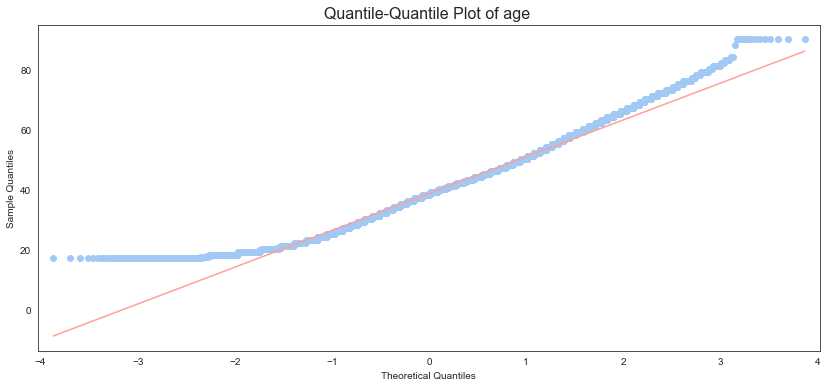


Testing Shapiro-Wilk with Significant level 0.05
Statistics=0.9796718955039978, p=1.6815581571897805e-44
Sample does not look Normal

Testing D’Agostino’s K^2 Test with Significant level 0.05
Statistics=589.7024402834885, p=8.866293630510966e-129
Sample does not look Normal

Testing Anderson-Darling Test
Statistics=53.6132654501198
At significant level 15.0%, Test Statistic = 53.6132654501198 / Critical value = 0.576
Sample does not look Normal
At significant level 10.0%, Test Statistic = 53.6132654501198 / Critical value = 0.656
Sample does not look Normal
At significant level 5.0%, Test Statistic = 53.6132654501198 / Critical value = 0.787
Sample does not look Normal
At significant level 2.5%, Test Statistic = 53.6132654501198 / Critical value = 0.918
Sample does not look Normal
At significant level 1.0%, Test Statistic = 53.6132654501198 / Critical value = 1.092
Sample does not look Normal


/Users/hyundai/anaconda/envs/pytorch/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Users/hyundai/anaconda/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


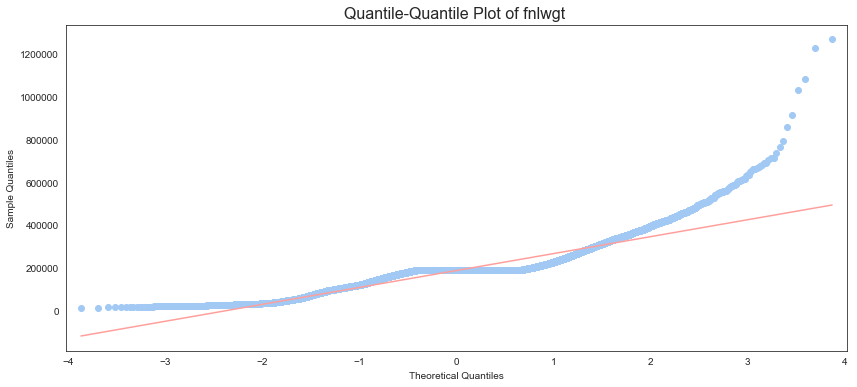


Testing Shapiro-Wilk with Significant level 0.05
Statistics=0.8331381678581238, p=0.0
Sample does not look Normal

Testing D’Agostino’s K^2 Test with Significant level 0.05
Statistics=7486.636599775933, p=0.0
Sample does not look Normal

Testing Anderson-Darling Test
Statistics=1117.323995775576
At significant level 15.0%, Test Statistic = 1117.323995775576 / Critical value = 0.576
Sample does not look Normal
At significant level 10.0%, Test Statistic = 1117.323995775576 / Critical value = 0.656
Sample does not look Normal
At significant level 5.0%, Test Statistic = 1117.323995775576 / Critical value = 0.787
Sample does not look Normal
At significant level 2.5%, Test Statistic = 1117.323995775576 / Critical value = 0.918
Sample does not look Normal
At significant level 1.0%, Test Statistic = 1117.323995775576 / Critical value = 1.092
Sample does not look Normal


/Users/hyundai/anaconda/envs/pytorch/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


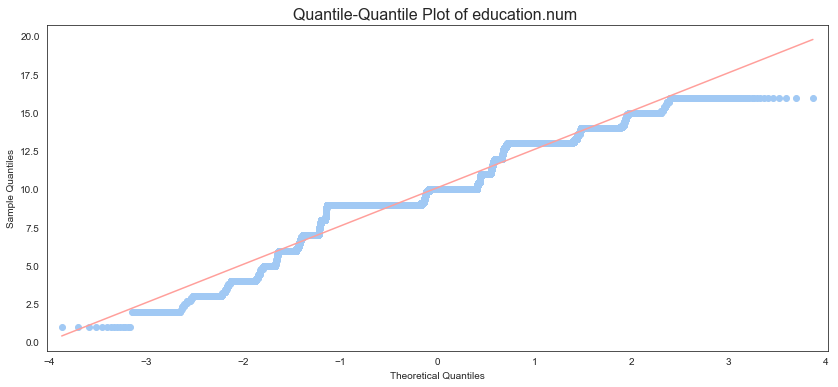


Testing Shapiro-Wilk with Significant level 0.05
Statistics=0.9298838973045349, p=0.0
Sample does not look Normal

Testing D’Agostino’s K^2 Test with Significant level 0.05
Statistics=451.2989127578211, p=1.0038902820848005e-98
Sample does not look Normal

Testing Anderson-Darling Test
Statistics=583.5729368297543
At significant level 15.0%, Test Statistic = 583.5729368297543 / Critical value = 0.576
Sample does not look Normal
At significant level 10.0%, Test Statistic = 583.5729368297543 / Critical value = 0.656
Sample does not look Normal
At significant level 5.0%, Test Statistic = 583.5729368297543 / Critical value = 0.787
Sample does not look Normal
At significant level 2.5%, Test Statistic = 583.5729368297543 / Critical value = 0.918
Sample does not look Normal
At significant level 1.0%, Test Statistic = 583.5729368297543 / Critical value = 1.092
Sample does not look Normal


/Users/hyundai/anaconda/envs/pytorch/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


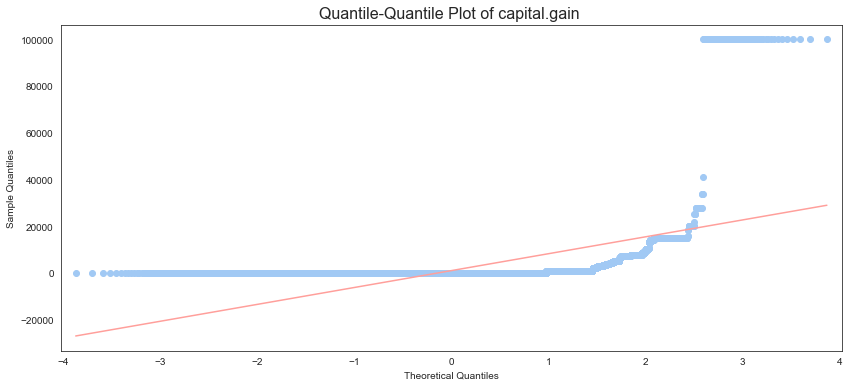


Testing Shapiro-Wilk with Significant level 0.05
Statistics=0.12736964225769043, p=0.0
Sample does not look Normal

Testing D’Agostino’s K^2 Test with Significant level 0.05
Statistics=31418.24768381053, p=0.0
Sample does not look Normal

Testing Anderson-Darling Test
Statistics=5676.460803560996
At significant level 15.0%, Test Statistic = 5676.460803560996 / Critical value = 0.576
Sample does not look Normal
At significant level 10.0%, Test Statistic = 5676.460803560996 / Critical value = 0.656
Sample does not look Normal
At significant level 5.0%, Test Statistic = 5676.460803560996 / Critical value = 0.787
Sample does not look Normal
At significant level 2.5%, Test Statistic = 5676.460803560996 / Critical value = 0.918
Sample does not look Normal
At significant level 1.0%, Test Statistic = 5676.460803560996 / Critical value = 1.092
Sample does not look Normal


/Users/hyundai/anaconda/envs/pytorch/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


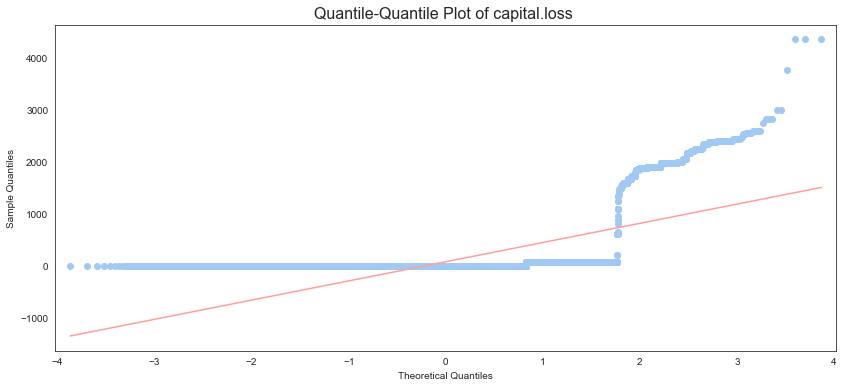


Testing Shapiro-Wilk with Significant level 0.05
Statistics=0.23868268728256226, p=0.0
Sample does not look Normal

Testing D’Agostino’s K^2 Test with Significant level 0.05
Statistics=17855.158385888295, p=0.0
Sample does not look Normal

Testing Anderson-Darling Test
Statistics=5819.071372412454
At significant level 15.0%, Test Statistic = 5819.071372412454 / Critical value = 0.576
Sample does not look Normal
At significant level 10.0%, Test Statistic = 5819.071372412454 / Critical value = 0.656
Sample does not look Normal
At significant level 5.0%, Test Statistic = 5819.071372412454 / Critical value = 0.787
Sample does not look Normal
At significant level 2.5%, Test Statistic = 5819.071372412454 / Critical value = 0.918
Sample does not look Normal
At significant level 1.0%, Test Statistic = 5819.071372412454 / Critical value = 1.092
Sample does not look Normal


/Users/hyundai/anaconda/envs/pytorch/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


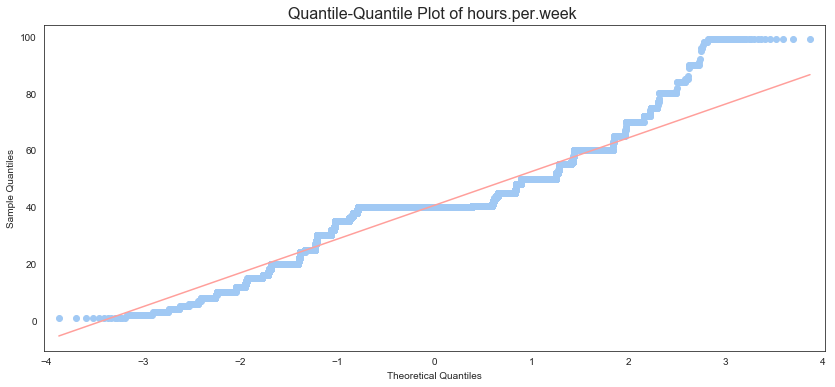


Testing Shapiro-Wilk with Significant level 0.05
Statistics=0.8608574271202087, p=0.0
Sample does not look Normal

Testing D’Agostino’s K^2 Test with Significant level 0.05
Statistics=1726.86887874949, p=0.0
Sample does not look Normal

Testing Anderson-Darling Test
Statistics=1195.9845461494806
At significant level 15.0%, Test Statistic = 1195.9845461494806 / Critical value = 0.576
Sample does not look Normal
At significant level 10.0%, Test Statistic = 1195.9845461494806 / Critical value = 0.656
Sample does not look Normal
At significant level 5.0%, Test Statistic = 1195.9845461494806 / Critical value = 0.787
Sample does not look Normal
At significant level 2.5%, Test Statistic = 1195.9845461494806 / Critical value = 0.918
Sample does not look Normal
At significant level 1.0%, Test Statistic = 1195.9845461494806 / Critical value = 1.092
Sample does not look Normal
                Anderson-Darling    D'Agostino  Shapiro-Wilk
age                    53.613265    589.702440      0.97967

/Users/hyundai/anaconda/envs/pytorch/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [40]:
normality_test_result = pd.DataFrame(columns=["Anderson-Darling", "D'Agostino", "Shapiro-Wilk"])

for col in num_cols:
    temp_result = normality_test(X_train, col)
    normality_test_result = pd.concat([normality_test_result, temp_result], axis=0)
print(normality_test_result)

In [41]:
non_normal_num_cols = num_cols
normal_num_cols = []

### Standardize Numeric Data via Box-Cox Transformation
- 위 Normality test를 통과하지 못 할 경우, Box-Cox Transformation을 해본다.

In [42]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.utils.validation import check_is_fitted, check_random_state, FLOAT_DTYPES
from sklearn.preprocessing import StandardScaler

def get_soft_add_term(df, test_df, soft_level = 1e-3):
    array = np.array(df)
    test_array = np.array(test_df)
    total_array = np.vstack([array, test_array])
    soft_add_term = abs(total_array.min()) + soft_level
    return soft_add_term


def boxcox(x, lmbda):
    with np.errstate(invalid='ignore'):
        return stats.boxcox(x, lmbda)


class PowerTransformer(BaseEstimator, TransformerMixin):
    """Apply a power transform featurewise to make data more Gaussian-like.
    source: https://github.com/scikit-learn/scikit-learn/blob/526aede/sklearn/preprocessing/data.py#L2383
    ----------
    G.E.P. Box and D.R. Cox, "An Analysis of Transformations", Journal of the
    Royal Statistical Society B, 26, 211-252 (1964).
    """
    def __init__(self, method='box-cox', standardize=True, copy=True):
        self.method = method
        self.standardize = standardize
        self.copy = copy

    def fit(self, X, y=None):
        """Estimate the optimal parameter for each feature.
        The optimal parameter for minimizing skewness is estimated
        on each feature independently. If the method is Box-Cox,
        the lambdas are estimated using maximum likelihood.
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The data used to estimate the optimal transformation parameters.
        y : Ignored
        Returns
        -------
        self : object
        """
        X = self._check_input(X, check_positive=True, check_method=True)

        self.lambdas_ = []
        transformed = []

        for col in X.T:
            # the computation of lambda is influenced by NaNs and we need to
            # get rid of them to compute them.
            _, lmbda = stats.boxcox(col[~np.isnan(col)], lmbda=None)
            col_trans = boxcox(col, lmbda)
            self.lambdas_.append(lmbda)
            transformed.append(col_trans)

        self.lambdas_ = np.array(self.lambdas_)
        transformed = np.array(transformed)

        if self.standardize:
            self._scaler = StandardScaler()
            self._scaler.fit(X=transformed.T)

        return self

    def transform(self, X):
        """Apply the power transform to each feature using the fitted lambdas.
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The data to be transformed using a power transformation.
        """
        check_is_fitted(self, 'lambdas_')
        X = self._check_input(X, check_positive=True, check_shape=True)

        for i, lmbda in enumerate(self.lambdas_):
            X[:, i] = boxcox(X[:, i], lmbda)

        if self.standardize:
            X = self._scaler.transform(X)

        return X

    def inverse_transform(self, X):
        """Apply the inverse power transformation using the fitted lambdas.
        The inverse of the Box-Cox transformation is given by::
            if lambda == 0:
                X = exp(X_trans)
            else:
                X = (X_trans * lambda + 1) ** (1 / lambda)
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The transformed data.
        """
        check_is_fitted(self, 'lambdas_')
        X = self._check_input(X, check_shape=True)

        if self.standardize:
            X = self._scaler.inverse_transform(X)

        for i, lmbda in enumerate(self.lambdas_):
            x = X[:, i]
            if lmbda == 0:
                x_inv = np.exp(x)
            else:
                x_inv = (x * lmbda + 1) ** (1 / lmbda)
            X[:, i] = x_inv

        return X

    def _check_input(self, X, check_positive=False, check_shape=False,
                     check_method=False):
        """Validate the input before fit and transform.
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
        check_positive : bool
            If True, check that all data is positive and non-zero.
        check_shape : bool
            If True, check that n_features matches the length of self.lambdas_
        check_method : bool
            If True, check that the transformation method is valid.
        """
        X = check_array(X, ensure_2d=True, dtype=FLOAT_DTYPES, copy=self.copy,
                        force_all_finite='allow-nan')

        with np.warnings.catch_warnings():
            np.warnings.filterwarnings(
                'ignore', r'All-NaN (slice|axis) encountered')
            if (check_positive and self.method == 'box-cox' and
                    np.nanmin(X) <= 0):
                raise ValueError("The Box-Cox transformation can only be "
                                 "applied to strictly positive data")

        if check_shape and not X.shape[1] == len(self.lambdas_):
            raise ValueError("Input data has a different number of features "
                             "than fitting data. Should have {n}, data has {m}"
                             .format(n=len(self.lambdas_), m=X.shape[1]))

        valid_methods = ('box-cox',)
        if check_method and self.method not in valid_methods:
            raise ValueError("'method' must be one of {}, "
                             "got {} instead."
                             .format(valid_methods, self.method))

        return X

In [43]:
#from sklearn.preprocessing import PowerTransformer (sklearn v0.20 dev)

print("Box-Cox Transfomation for {}".format(non_normal_num_cols))
# The Box-Cox transformation can only be applied to strictly positive data
soft_add_term = get_soft_add_term(X_dev[non_normal_num_cols], X_valid[non_normal_num_cols])

Scaler = PowerTransformer(method='box-cox', standardize=True)
Scaler.fit(X_train[non_normal_num_cols]+soft_add_term)

X_train_bc = Scaler.transform(X_train[non_normal_num_cols]+soft_add_term)
X_valid_bc = Scaler.transform(X_valid[non_normal_num_cols]+soft_add_term)
X_test_bc = Scaler.transform(X_test[non_normal_num_cols]+soft_add_term)

X_train_bc = pd.DataFrame(X_train_bc, index=X_train.index, columns=non_normal_num_cols)
X_valid_bc = pd.DataFrame(X_valid_bc, index=X_valid.index, columns=non_normal_num_cols)
X_test_bc = pd.DataFrame(X_test_bc, index=X_test.index, columns=non_normal_num_cols)

print("The lambda values of the Box-Cox Transformation: ")
print(Scaler.lambdas_)

Box-Cox Transfomation for ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
The lambda values of the Box-Cox Transformation: 
[ 0.39258381  0.59376864  1.33439813 -0.40571276 -0.38907278  0.9993341 ]


### Box-Cox Transformation을 한 데이터로 다시 Normality test를 해서, test statistics가 평균적으로 나아지면 Box-Cox Transform을 사용한다

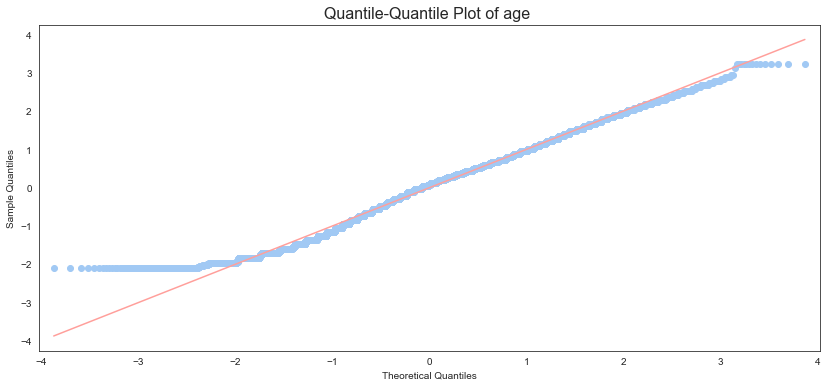


Testing Shapiro-Wilk with Significant level 0.05
Statistics=0.9901869297027588, p=2.7571051021223823e-33
Sample does not look Normal

Testing D’Agostino’s K^2 Test with Significant level 0.05
Statistics=248.2680360569973, p=1.2282335429275526e-54
Sample does not look Normal

Testing Anderson-Darling Test
Statistics=43.780154811658576
At significant level 15.0%, Test Statistic = 43.780154811658576 / Critical value = 0.576
Sample does not look Normal
At significant level 10.0%, Test Statistic = 43.780154811658576 / Critical value = 0.656
Sample does not look Normal
At significant level 5.0%, Test Statistic = 43.780154811658576 / Critical value = 0.787
Sample does not look Normal
At significant level 2.5%, Test Statistic = 43.780154811658576 / Critical value = 0.918
Sample does not look Normal
At significant level 1.0%, Test Statistic = 43.780154811658576 / Critical value = 1.092
Sample does not look Normal


/Users/hyundai/anaconda/envs/pytorch/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Users/hyundai/anaconda/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


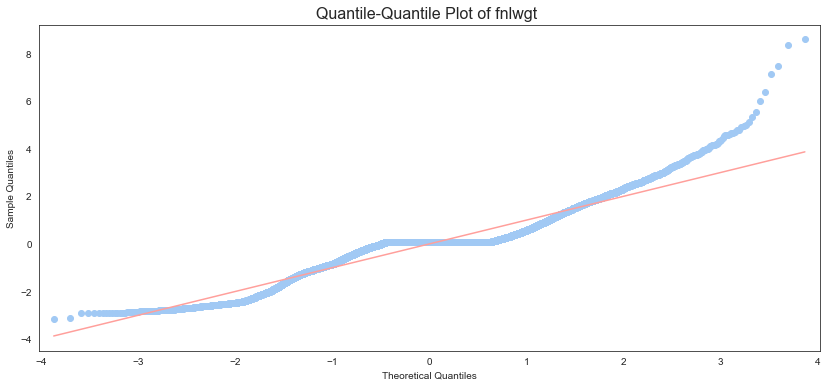


Testing Shapiro-Wilk with Significant level 0.05
Statistics=0.8787972927093506, p=0.0
Sample does not look Normal

Testing D’Agostino’s K^2 Test with Significant level 0.05
Statistics=1537.3921610670602, p=0.0
Sample does not look Normal

Testing Anderson-Darling Test
Statistics=1059.8141885803634
At significant level 15.0%, Test Statistic = 1059.8141885803634 / Critical value = 0.576
Sample does not look Normal
At significant level 10.0%, Test Statistic = 1059.8141885803634 / Critical value = 0.656
Sample does not look Normal
At significant level 5.0%, Test Statistic = 1059.8141885803634 / Critical value = 0.787
Sample does not look Normal
At significant level 2.5%, Test Statistic = 1059.8141885803634 / Critical value = 0.918
Sample does not look Normal
At significant level 1.0%, Test Statistic = 1059.8141885803634 / Critical value = 1.092
Sample does not look Normal


/Users/hyundai/anaconda/envs/pytorch/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


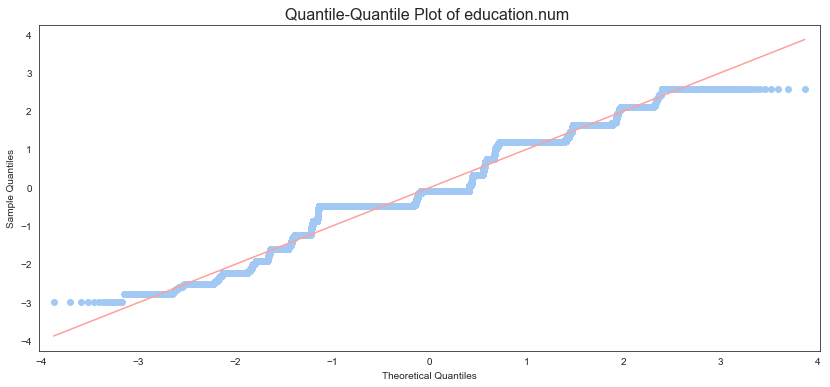


Testing Shapiro-Wilk with Significant level 0.05
Statistics=0.935639500617981, p=0.0
Sample does not look Normal

Testing D’Agostino’s K^2 Test with Significant level 0.05
Statistics=6.603168134005191, p=0.0368247882432648
Sample does not look Normal

Testing Anderson-Darling Test
Statistics=604.7644839192253
At significant level 15.0%, Test Statistic = 604.7644839192253 / Critical value = 0.576
Sample does not look Normal
At significant level 10.0%, Test Statistic = 604.7644839192253 / Critical value = 0.656
Sample does not look Normal
At significant level 5.0%, Test Statistic = 604.7644839192253 / Critical value = 0.787
Sample does not look Normal
At significant level 2.5%, Test Statistic = 604.7644839192253 / Critical value = 0.918
Sample does not look Normal
At significant level 1.0%, Test Statistic = 604.7644839192253 / Critical value = 1.092
Sample does not look Normal


/Users/hyundai/anaconda/envs/pytorch/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


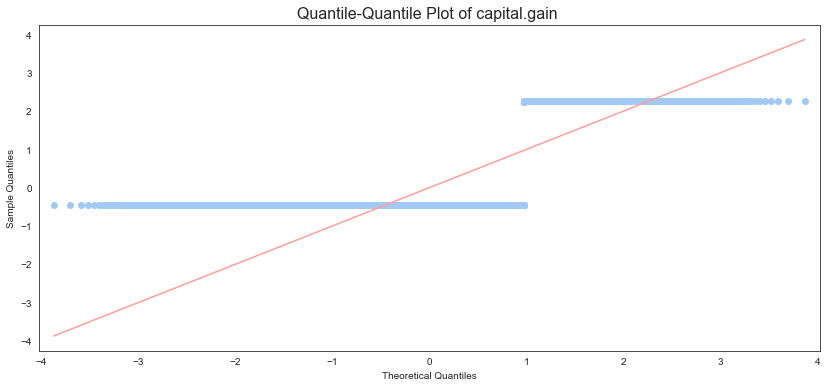


Testing Shapiro-Wilk with Significant level 0.05
Statistics=0.44667720794677734, p=0.0
Sample does not look Normal

Testing D’Agostino’s K^2 Test with Significant level 0.05
Statistics=5309.051519699727, p=0.0
Sample does not look Normal

Testing Anderson-Darling Test
Statistics=5266.43179146375
At significant level 15.0%, Test Statistic = 5266.43179146375 / Critical value = 0.576
Sample does not look Normal
At significant level 10.0%, Test Statistic = 5266.43179146375 / Critical value = 0.656
Sample does not look Normal
At significant level 5.0%, Test Statistic = 5266.43179146375 / Critical value = 0.787
Sample does not look Normal
At significant level 2.5%, Test Statistic = 5266.43179146375 / Critical value = 0.918
Sample does not look Normal
At significant level 1.0%, Test Statistic = 5266.43179146375 / Critical value = 1.092
Sample does not look Normal


/Users/hyundai/anaconda/envs/pytorch/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


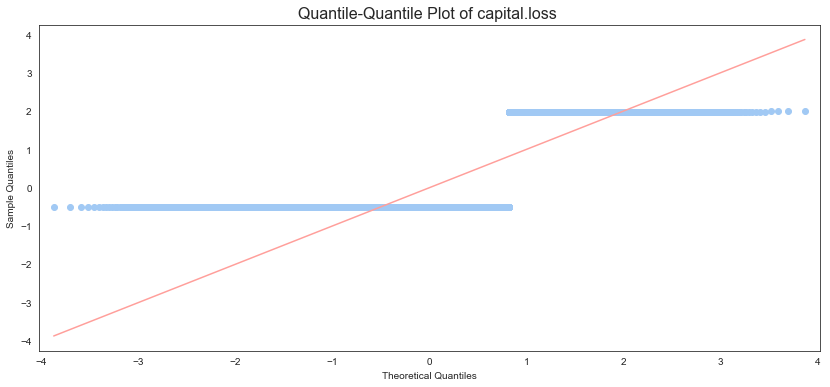


Testing Shapiro-Wilk with Significant level 0.05
Statistics=0.4960086941719055, p=0.0
Sample does not look Normal

Testing D’Agostino’s K^2 Test with Significant level 0.05
Statistics=3707.349387893062, p=0.0
Sample does not look Normal

Testing Anderson-Darling Test
Statistics=4822.913002882859
At significant level 15.0%, Test Statistic = 4822.913002882859 / Critical value = 0.576
Sample does not look Normal
At significant level 10.0%, Test Statistic = 4822.913002882859 / Critical value = 0.656
Sample does not look Normal
At significant level 5.0%, Test Statistic = 4822.913002882859 / Critical value = 0.787
Sample does not look Normal
At significant level 2.5%, Test Statistic = 4822.913002882859 / Critical value = 0.918
Sample does not look Normal
At significant level 1.0%, Test Statistic = 4822.913002882859 / Critical value = 1.092
Sample does not look Normal


/Users/hyundai/anaconda/envs/pytorch/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


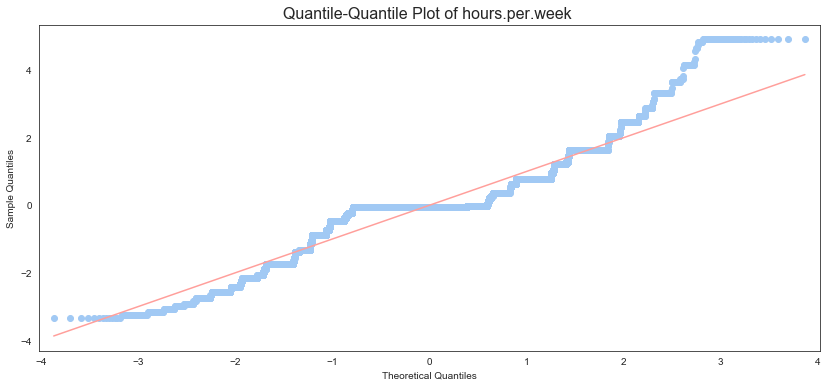


Testing Shapiro-Wilk with Significant level 0.05
Statistics=0.8609288930892944, p=0.0
Sample does not look Normal

Testing D’Agostino’s K^2 Test with Significant level 0.05
Statistics=1723.466090937934, p=0.0
Sample does not look Normal

Testing Anderson-Darling Test
Statistics=1196.0673271527376
At significant level 15.0%, Test Statistic = 1196.0673271527376 / Critical value = 0.576
Sample does not look Normal
At significant level 10.0%, Test Statistic = 1196.0673271527376 / Critical value = 0.656
Sample does not look Normal
At significant level 5.0%, Test Statistic = 1196.0673271527376 / Critical value = 0.787
Sample does not look Normal
At significant level 2.5%, Test Statistic = 1196.0673271527376 / Critical value = 0.918
Sample does not look Normal
At significant level 1.0%, Test Statistic = 1196.0673271527376 / Critical value = 1.092
Sample does not look Normal
                Anderson-Darling   D'Agostino  Shapiro-Wilk
age                    43.780155   248.268036      0.990187

/Users/hyundai/anaconda/envs/pytorch/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [44]:
normality_test_result_after_bc = pd.DataFrame(columns=["Anderson-Darling", "D'Agostino", "Shapiro-Wilk"])

for col in non_normal_num_cols:
    temp_result = normality_test(X_train_bc, col)
    normality_test_result_after_bc = pd.concat([normality_test_result_after_bc, temp_result], axis=0)
print(normality_test_result_after_bc)

In [45]:
print("Before Box-Cox...")
print(normality_test_result.loc[non_normal_num_cols,:])
print()
print("After Box-Cox...")
print(normality_test_result_after_bc)
print()
print("Normality Statistics is as much as...")
print(normality_test_result_after_bc / normality_test_result.loc[non_normal_num_cols,:])

Before Box-Cox...
                Anderson-Darling    D'Agostino  Shapiro-Wilk
age                    53.613265    589.702440      0.979672
fnlwgt               1117.323996   7486.636600      0.833138
education.num         583.572937    451.298913      0.929884
capital.gain         5676.460804  31418.247684      0.127370
capital.loss         5819.071372  17855.158386      0.238683
hours.per.week       1195.984546   1726.868879      0.860857

After Box-Cox...
                Anderson-Darling   D'Agostino  Shapiro-Wilk
age                    43.780155   248.268036      0.990187
fnlwgt               1059.814189  1537.392161      0.878797
education.num         604.764484     6.603168      0.935640
capital.gain         5266.431791  5309.051520      0.446677
capital.loss         4822.913003  3707.349388      0.496009
hours.per.week       1196.067327  1723.466091      0.860929

Normality Statistics is as much as...
                Anderson-Darling  D'Agostino  Shapiro-Wilk
age                

In [46]:
normality_rate = normality_test_result_after_bc / normality_test_result.loc[non_normal_num_cols,:]
normality_rate_avg = normality_rate.mean(axis = 1)

bc_num_cols = list(normality_rate_avg[normality_rate_avg <= 0.95].index)
non_bc_num_cols = list(normality_rate_avg[normality_rate_avg > 0.95].index)

print("We use Box-Cox Transformation on {}".format(bc_num_cols))
print("We use Z Transformation on {}".format(non_bc_num_cols + normal_num_cols))

We use Box-Cox Transformation on ['age', 'fnlwgt', 'education.num']
We use Z Transformation on ['capital.gain', 'capital.loss', 'hours.per.week']


In [47]:
print("Box-Cox Transfomation Value Assign for {}".format(bc_num_cols))

X_train.loc[:,bc_num_cols] = X_train_bc.loc[:,bc_num_cols]
X_valid.loc[:,bc_num_cols] = X_valid_bc.loc[:,bc_num_cols]
X_test.loc[:,bc_num_cols] = X_test_bc.loc[:,bc_num_cols]

Box-Cox Transfomation Value Assign for ['age', 'fnlwgt', 'education.num']


/Users/hyundai/anaconda/envs/pytorch/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### 만약 나아지지 않는 경우, StandardScaler로 단순 표준화 전처리 작업을 한다.

In [48]:
from sklearn.preprocessing import StandardScaler

print("Z Transfomation for {}".format(non_bc_num_cols + normal_num_cols))
Scaler = StandardScaler()
Scaler.fit(X_train[non_bc_num_cols + normal_num_cols])

X_train.loc[:,non_bc_num_cols + normal_num_cols] = Scaler.transform(X_train[non_bc_num_cols + normal_num_cols])
X_valid.loc[:,non_bc_num_cols + normal_num_cols] = Scaler.transform(X_valid[non_bc_num_cols + normal_num_cols])
X_test.loc[:,non_bc_num_cols + normal_num_cols] = Scaler.transform(X_test[non_bc_num_cols + normal_num_cols])

Z Transfomation for ['capital.gain', 'capital.loss', 'hours.per.week']


/Users/hyundai/anaconda/envs/pytorch/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


## 여기까지 전처리 된 데이터를 NN-based Modeling에 사용하기 위해 저장한다.
- NN은 Tensorflow로 작업할 계획인데, Tensorflow는 Feature Column API가 있어서, 범주형 변수의 경우 Label Encoding만 되어 있으면 충분하다(즉, OneHotEncoding을 하지 않아도 된다. 그리고 하지 않는게 좋다)
- 따라서, 범주형 변수의 OneHotEncoding 작업을 하기 전인 이 시점에서 NN-based Modeling을 위한 데이터를 저장한다

In [49]:
X_nn_train = X_train.copy()
X_nn_valid = X_valid.copy()
X_nn_test = X_test.copy()

## OneHot Encoding을 수행한다
- 범주형 변수에 대해서 OneHot Encoding 수행
- 단, native.country, education_education.num_bin 변수는 범주 갯수가 많으니, 단순 One-Hot Encoding을 사용하기 보다는 Embedding이나 Frequency 기반의 방법론을 사용하는 것이 좋으므로 따로 전처리를 수행한다

In [50]:
label_level_meta = X_nontree[cat_cols].nunique()
print(label_level_meta)

workclass                        9
sex                              3
race                             6
native.country                  42
marital.status                   7
capital.gain_bin                10
education_education.num_bin    103
occupation                      15
relationship                     6
capital.loss_bin                10
dtype: int64


In [51]:
onehot_cat_cols = list(set(cat_cols)-set(["native.country", "education_education.num_bin"]))
sparse_cat_cols = ["native.country", "education_education.num_bin"]

print("We use OneHot Encoding on {}".format(onehot_cat_cols))
print("We use Other Method(for example, feature_hashing) on {}".format(sparse_cat_cols))

We use OneHot Encoding on ['workclass', 'sex', 'race', 'marital.status', 'capital.gain_bin', 'occupation', 'relationship', 'capital.loss_bin']
We use Other Method(for example, feature_hashing) on ['native.country', 'education_education.num_bin']


In [52]:
def onehotencoder_fit(df, valid_df, test_df, cols):
    total_df = pd.concat([df[cols], valid_df[cols], test_df[cols]], axis=0).astype(np.int64)
    from sklearn.preprocessing import OneHotEncoder
    enc =  OneHotEncoder(dtype=np.float32)
    enc.fit(total_df)
    return enc


def onehotencoding(df, enc, cols):
    temp_df = df[cols].astype(np.int64)
    encoded = enc.transform(temp_df.values)
    encoded = encoded.todense()
    encoded_cols = []
    for i, col in enumerate(cols):
        for j in range(enc.n_values_[i]):
            encoded_cols.append('_'.join([col, str(j)]))
    encoded_df = pd.DataFrame(encoded, index=df.index, columns=encoded_cols)

    out_df = df.drop(cols, axis=1)
    out_df[encoded_cols] = encoded_df
    return out_df

In [53]:
print("OneHot Encoding on {}".format(onehot_cat_cols))

enc = onehotencoder_fit(X_train, X_valid, X_test, onehot_cat_cols)

X_train = onehotencoding(X_train, enc, onehot_cat_cols)
X_valid = onehotencoding(X_valid, enc, onehot_cat_cols)
X_test = onehotencoding(X_test, enc, onehot_cat_cols)

OneHot Encoding on ['workclass', 'sex', 'race', 'marital.status', 'capital.gain_bin', 'occupation', 'relationship', 'capital.loss_bin']


### Frequency-based Method for Sparse Categorical Variables
- 단, native.country 변수는 1-1.(2) Deep EDA 에서 적은 바와 같이, 단순 One-Hot Encoding을 사용하기 보다는 Embedding이나 Frequency 기반의 방법론을 사용하는 것이 좋으므로 따로 전처리를 수행한다
- 이 때, 전처리에 사용하는 Algorithm은 CatBoost에서 사용하는 방법론을 차용한다

In [54]:
def sparse_cat_feature_map_fit(df, y, cols):
    cat_feature_map = {}

    # prior
    target_proprotion = pd.Series(y).value_counts()
    prior = target_proprotion[1] / target_proprotion.sum()

    for col in cols:
        temp1 = df[col].value_counts()
        temp2 = df[col][y==1].value_counts()
        map = (temp2 + prior) / (temp1 + 1)
        cat_feature_map[col] = map

    return cat_feature_map, prior


def sparse_cat_feature_mapping(df, cat_feature_map, prior):
    for col, map in cat_feature_map.items():
        df[col] = df[col].map(map)
        df[col] = df[col].fillna(prior)
    return df

In [55]:
print("sparse categorical feature mapping on {} from CatBoost".format(sparse_cat_cols))

mapping, prior = sparse_cat_feature_map_fit(X_train, y_train, sparse_cat_cols)

X_train = sparse_cat_feature_mapping(X_train, mapping, prior)
X_valid = sparse_cat_feature_mapping(X_valid, mapping, prior)
X_test = sparse_cat_feature_mapping(X_test, mapping, prior)

sparse categorical feature mapping on ['native.country', 'education_education.num_bin'] from CatBoost


In [56]:
X_svm_train = X_train.copy()
X_svm_valid = X_valid.copy()
X_svm_test = X_test.copy()

In [ ]:
X_tree_train.head()

In [ ]:
X_nn_train.head()

In [ ]:
X_svm_train.head()

## 이제 Feature Engineering의 힘을 느껴보자

In [ ]:
benchmark_num_cols = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
benchmark_cat_cols = list(set(X_benchmark_dev.columns) - set(benchmark_num_cols))

In [ ]:
# missing value imputation
X_benchmark_dev[benchmark_num_cols] = X_benchmark_dev[benchmark_num_cols].fillna(0)
X_benchmark_test[benchmark_num_cols] = X_benchmark_test[benchmark_num_cols].fillna(0)
X_benchmark_dev[benchmark_cat_cols] = X_benchmark_dev[benchmark_cat_cols].fillna("NA_level")
X_benchmark_test[benchmark_cat_cols] = X_benchmark_test[benchmark_cat_cols].fillna("NA_level")


# Scaling for num_cols
Scaler = StandardScaler()
Scaler.fit(X_benchmark_dev[benchmark_num_cols])
X_benchmark_dev.loc[:,benchmark_num_cols] = Scaler.transform(X_benchmark_dev[benchmark_num_cols])
X_benchmark_test.loc[:,benchmark_num_cols] = Scaler.transform(X_benchmark_test[benchmark_num_cols])


#OnehotEncoding for cat_cols
X_benchmark = pd.concat([X_benchmark_dev, X_benchmark_test], axis=0, ignore_index=False)
X_benchmark = pd.get_dummies(X_benchmark, columns=benchmark_cat_cols, dummy_na=True)
X_benchmark_dev = X_benchmark.loc[X_benchmark_dev.index,:]
X_benchmark_test = X_benchmark.loc[X_benchmark_test.index,:]

In [ ]:
# Evaluation metrics
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as ss
from sklearn.metrics import auc
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score,
                             roc_curve, average_precision_score, precision_recall_curve,
                             precision_score, recall_score, f1_score, matthews_corrcoef)


def get_pred_label(y_score, threshold=0.5):
    y_score = np.where(y_score >= threshold, 1, 0)
    return y_score


def plot_roc_curve(y_true, y_score):
    '''
    Plot ROC Curve
    '''
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic; AUROC={}'.format(roc_auc))
    plt.plot(fpr, tpr, label='AUROC = %0.4f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-0.001, 1])
    plt.ylim([0, 1.001])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


def plot_pr_curve(y_true, y_score):
    '''
    Plot Precision-recall Curve
    '''
    precision, recall, th = precision_recall_curve(y_true, y_score)
    avg_prec = average_precision_score(y_true, y_score)

    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

    plt.plot(recall, precision, 'b', label='Precision-Recall curve')
    plt.title('Recall vs Precision; PRAUC={0:0.3f}'.format(avg_prec))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.show()


def plot_conf_mtx(y_true, y_pred, class_labels):
    '''
    Plot Confusion matrix
    '''
    print("Confusion matrix at threshold 0.5")
    print(classification_report(y_true, y_pred, target_names=class_labels))
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(conf_matrix, xticklabels=class_labels, yticklabels=class_labels, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()


def get_binary_classification_metrics(y_true, y_score, y_pred, ndigits=3):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    auroc = round(auc(fpr, tpr), ndigits)
    auprc = round(average_precision_score(y_true, y_score), ndigits)
    mcc = round(matthews_corrcoef(y_true, y_pred), ndigits)
    prec = round(precision_score(y_true, y_pred), ndigits)
    rec = round(recall_score(y_true, y_pred), ndigits)
    f1 = round(f1_score(y_true, y_pred), ndigits)
    acc = round(accuracy_score(y_true, y_pred), ndigits)

    metrics = {'AUROC': [auroc], 'AUPRC': [auprc], 'MCC': [mcc], 'Accuracy': [acc],
               'Precision': [prec], 'Recall': [rec], 'F1': [f1]}
    metrics = pd.DataFrame(metrics, columns=['AUROC', 'AUPRC', 'MCC', 'Accuracy', 'Precision', 'Recall', 'F1'])

    return metrics


def prob_barplot(y_prob, bins, right=False, filename=None, figsize=(8, 6)):
    c = pd.cut(y_prob, bins, right=right)
    counts = c.value_counts()
    percents = 100. * counts / len(c)
    percents.plot.bar(rot=0, figsize=figsize)
    plt.title("Histogram of Score")
    print("{}% data are computed".format(sum(percents)))
    print("The distribution of scores:")
    print(percents)
    if filename is not None:
        plt.savefig('{}.png'.format(filename))
    plt.show()


def evaluate_result(y, score, threshold=0.5):
    score = score.reshape((len(score),))
    pred = get_pred_label(score, threshold)
    prob_barplot(score, np.arange(0.0, 1.11, 0.1))
    plot_roc_curve(y, score)
    plot_pr_curve(y, score)
    plot_conf_mtx(y, pred, class_labels=['0','1'])
    metric = get_binary_classification_metrics(y, score, pred, ndigits=4)
    print("The Model Performance Evaluation:")
    print(metric)
    return metric

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced')
lr.fit(X_benchmark_dev, y_dev)
score = lr.predict_proba(X_benchmark_test)[:,1]
lr_result = evaluate_result(y_test, score, threshold=0.5)

In [ ]:
X_svm_dev = pd.concat([X_svm_train, X_svm_valid], axis=0, ignore_index=True)
y_svm_dev = np.concatenate([y_train, y_valid], axis=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced')
lr.fit(X_svm_dev, y_svm_dev)
score = lr.predict_proba(X_svm_test)[:,1]
lr_result = evaluate_result(y_test, score, threshold=0.5)

# Part2: Modeling & Evaluation Process

## 0. Dev (Train / Valid) / Test Data에 대한 이해
- Dev: 05~17년 수능 기출
- Train: 05~16년 수능 기출
- Valid: 17년 수능 기출
- Test: 18년 수능
- Modeling 목적: 18년 수능을 가장 잘 푸는 학생을 뽑는 것
- Algorithm: 학생의 공부법
- Train / Valid Split: 학습하는 기출문제와 학생 선출 방법
- 여러 학생 중 택일
- (Data Scientist가 선택한 학생에게 기대하는바)
    - 17년 수능 기출(Validation data)에서 문제를 잘 푼 것처럼 18년 수능에서도 문제를 잘풀기를 기대함(성능 유지 기대)
    - 여러 학생 중 택일을 했으므로, 다른 학생들보다는 우수할 것을 기대 (Baseline보다는 성능이 좋아야함)

## 1. Data 자체의 기본 성능을 측정하기 위해, Baseline Modeling을 한다.
- 위의 Benchmark와는 달리, Baseline Modeling은 Validation Set에 한다
- Case1: 모든 Score = 0
- Case2: 모든 Score = 1
- Case3: LR(Logistic Regression) Score, with Default Parameter
- 이중 Maximum 값이 Baseline이 된다.
- 본 문제는 Positive Label Percentage = 24%이므로, AUROC(Area Under ROC Curve)가 가장 적합한 Evaluation Metric으로 보임
- 그 외에도, AUPRC(Area Under Precision-Recall Curve), MCC, Precison, Recall, f1-score, Accuracy는 참고용 Metric으로 사용한다.
- 그러나, Hyperparameter Tuning과 모델 성능 측정은 모두 AUROC로 한다

### Case1: 모든 Score = 0

In [ ]:
score = np.zeros(len(X_valid))

constant_result = evaluate_result(y_valid, score, threshold=0.5)

### Case2: 모든 Score = 1

In [ ]:
score = np.ones(len(X_valid))

constant_result = evaluate_result(y_valid, score, threshold=0.5)

### Case3: LR(Logistic Regression) Score, with Default Parameter

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced')
lr.fit(X_svm_train, y_train)
score = lr.predict_proba(X_svm_valid)[:,1]
lr_result = evaluate_result(y_valid, score, threshold=0.5)

## 2. 다양한 Algorithm으로 Modeling을 한다.
- 다양한 Package가 있고, 우리는 lgb, tf, sklearn을 해본다

## Tree-based Modeling: LightGBM

In [ ]:
import lightgbm as lgb

X_ltrain = lgb.Dataset(X_tree_train, label=y_train, categorical_feature=cat_cols)
X_lvalid = lgb.Dataset(X_tree_valid, label=y_valid, categorical_feature=cat_cols, reference=X_ltrain)
num_boost_rounds = 10000
early_stopping_rounds = 200
cutoff_pred = 0.5

defualt_params = {
    'metric': 'auc',
    'objective': 'binary',
    'is_unbalance': 'true',
    'boosting': 'goss'
}

In [ ]:
%%time

classifier = lgb.train(defualt_params, X_ltrain, valid_sets=X_lvalid, 
                           num_boost_round=num_boost_rounds,   
                           early_stopping_rounds=early_stopping_rounds, verbose_eval=100)

In [ ]:
score = classifier.predict(X_tree_valid)
lgb_result = evaluate_result(y_valid, score, threshold=0.5)

## NN-based Modeling

In [ ]:
import tensorflow as tf

In [ ]:
def indicator_fc(col, num_buckets):
    cat_column = tf.feature_column.categorical_column_with_identity(key=col, num_buckets=num_buckets)
    indicator = tf.feature_column.indicator_column(cat_column)
    return indicator


def embedding_fc(col, num_buckets, embedding_dim):
    cat_column = tf.feature_column.categorical_column_with_identity(key=col, num_buckets=num_buckets)
    embedding = tf.feature_column.embedding_column(cat_column, embedding_dim)
    return embedding

In [ ]:
batch_size = 32
eval_size = 1000

y_train = pd.Series(y_train, index=X_train.index)
y_valid = pd.Series(y_valid, index=X_valid.index)

train_input_fn = tf.estimator.inputs.pandas_input_fn(X_nn_train, y_train, batch_size = batch_size, num_threads=3, shuffle=True)
pred_input_fn = tf.estimator.inputs.pandas_input_fn(X_nn_valid, y_valid, batch_size = len(X_nn_valid), shuffle=False)

In [ ]:
feature_columns = []

for col in num_cols:
    feature_columns.append(tf.feature_column.numeric_column(key=col, dtype=tf.float32))

for col in onehot_cat_cols:
    feature_columns.append(indicator_fc(col, label_level_meta[col]))
    
for col in sparse_cat_cols:
    feature_columns.append(embedding_fc(col, label_level_meta[col], 6*np.power(label_level_meta[col], 0.25).astype(np.int)))

In [ ]:
params = {
    "feature_columns": feature_columns,
    "hidden_units": [10, 10],
    "optimizer": tf.train.AdamOptimizer(learning_rate=0.01),
    "activation_fn": tf.nn.relu,
    "dropout": 0.5,
}

classifier = tf.estimator.DNNClassifier(**params)

In [ ]:
classifier.train(input_fn=train_input_fn, steps=50000)

In [ ]:
def get_score_from_estimator(estimator, input_fn, size):
    import itertools
    score = estimator.predict(input_fn=input_fn)
    predictions = list(itertools.islice(score, size))
    print("the key of predictions = ", list(predictions[0].keys()))
    score = np.array([dic['logistic'] for dic in predictions])
    return score

In [ ]:
%%time
score = get_score_from_estimator(classifier, pred_input_fn, len(X_nn_valid))

In [ ]:
dnn_result = evaluate_result(y_valid, score, threshold=0.5)

## SVM Modeling

In [ ]:
from sklearn.svm import SVC

classifier = SVC(probability=True, class_weight='balanced')
classifier.fit(X_svm_train, y_train)
score = classifier.predict_proba(X_svm_valid)[:,1]
svm_result = evaluate_result(y_valid, score, threshold=0.5)

## 3. Model을 Tuning한다.
- GridSearch, RandomSearch, Baysian Optimization, Differential Evolution 등이 있다.
- 이 중, GridSearch만 안쓰면된다 (효율 안좋음)
- 우리는 가장 간단하면서도 효율적인 RandomSearch를 한다

## HyperParameter Tuning

In [ ]:
from sklearn.model_selection import ParameterSampler

defualt_params = {
    'metric': 'auc',
    'objective': 'binary',
    'is_unbalance': 'true',
    'boosting': 'goss'
}


params_space = {
    'learning_rate': list(np.exp(-np.arange(1.0, 3.0, 0.1)*np.log(10))),
    'num_leaves': list(np.arange(15, 45,1)),
    'max_depth': list(np.arange(5, 25, 1)),
    'min_data_in_leaf': list(np.arange(10, 50, 1)),
    'bagging_fraction': list(np.arange(0.2, 1.0, 0.1)),
    'feature_fraction': list(np.arange(0.2, 1.0, 0.1)),
    'lambda_l1': list(np.exp(-np.arange(1.0, 3.0, 0.1)*np.log(10))),
    'lambda_l2': list(np.exp(-np.arange(1.0, 3.0, 0.1)*np.log(10))),
    'min_gain_to_split': list(np.exp(-np.arange(2, 4.0, 0.1)*np.log(10))), 
}

num_trials = 25
best_AUROC = lgb_result["AUROC"].values
threshold = 0.5

params_random_search = ParameterSampler(params_space, n_iter=num_trials)
selected_params = list(params_random_search)
selected_params_df = pd.DataFrame(selected_params)

In [ ]:
%%time
metrics_log = lgb_result

for trial, param_update in zip(range(num_trials), selected_params):
    params = defualt_params.copy()
    params.update(param_update)
    
    X_ltrain = lgb.Dataset(X_tree_train, label=y_train, categorical_feature=cat_cols)
    X_lvalid = lgb.Dataset(X_tree_valid, label=y_valid, categorical_feature=cat_cols, reference=X_ltrain)
    
    classifier = lgb.train(params, X_ltrain, valid_sets=X_lvalid, 
                           num_boost_round=num_boost_rounds,   
                           early_stopping_rounds=early_stopping_rounds, verbose_eval=False)
    score = classifier.predict(X_tree_valid)
    pred = get_pred_label(score, threshold)
    eval_metrics = get_binary_classification_metrics(y_valid, score, pred, ndigits=4)
    print("The Model Parameters at trial {}:".format(trial))
    print(selected_params_df.loc[trial,:])
    print("The Model Performance Evaluation at trial {}:".format(trial))
    print(eval_metrics)
    
    # eval metrics logging
    metrics_log = pd.concat([metrics_log, eval_metrics], axis=0, ignore_index=True)
    
    # best model
    temp_AUROC = eval_metrics["AUROC"].values
    if best_AUROC < temp_AUROC:
        best_AUROC = temp_AUROC
        best_classifier = classifier
        best_params = selected_params_df.loc[trial,:]
        print("Best LightGBM Model is updated at trial {} with AUROC = {}".format(trial, best_AUROC))
        print("Parameters = {}".format(best_params))

In [ ]:
print("LightGBM 25 Random Search Results: ")
print(metrics_log)
print()
print()
print("LightGBM 25 Random Search Average Results: ")
print(metrics_log.mean())

In [ ]:
print("AUROC of the Best LightGBM Model = {}".format(best_AUROC))
print("Selected Hyperparameters of the Best LightGBM Model:")
print(best_params)

In [ ]:
score = best_classifier.predict(X_tree_valid)
lgb_best_result = evaluate_result(y_valid, score, threshold=0.5)

## Final Test on Best Model
- 지금까지 여러 Algorithm을 시도했고, 그 중 Validation Data에서 가장 높은 AUROC 점수를 얻은 Algorithm을 가지고 Test Set에서 Evaluate해본다.
- 이는, Validation Data는 여러번 반복해서 볼 수 있는 문제집이라면, Test Data은 단 한번 볼 수 있는 수능같은 개념이다.
- 수능 점수가 나오면, 우리는 이를 반박하지 못하고 Accept해야한다
- Test Data에서도 모형 성능이 유지된다면, 성공한 모델링이라고 볼 수 있다
  ###### [Final AUROC: 0.9093]
- AUROC 0.9093으로, 모형의 Generalization 성능이 입증 되었음을 알 수 있다
    - Training 과정 중에 test data를 한 번도 본 적이 없으며,
    - Validation data에서 Baseline Modeling은 0.905이며,
    - 최적화 과정에서 많은 Algorithm 들이 0.91 문턱도 못 간 것을 생각해보면 말이다.

In [ ]:
test_score = best_classifier.predict(X_tree_test)
test_result = evaluate_result(y_test, test_score, threshold=0.5)